In [1]:
MY_SECRET_KEY="lhIRJhxq3sKGdKvatCDL"

In [3]:
!pip install ultralytics
!pip install roboflow

In [3]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image


WARNING torchvision==0.18 is incompatible with torch==2.4.
Run 'pip install torchvision==0.19' to fix torchvision or 'pip install -U torch torchvision' to update both.
For a full compatibility table see https://github.com/pytorch/vision#installation
WARNING Known issue with torch==2.4.0 on Windows with CPU, recommend upgrading to torch>=2.4.1 to resolve https://github.com/ultralytics/ultralytics/issues/15049


In [5]:
rf = Roboflow(api_key=MY_SECRET_KEY)
project = rf.workspace("-jwzpw").project("continuous_fire")
dataset = project.version(6).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=./continuous_fire-6/data.yaml epochs=1 imgsz=640 plots=True verbose=True

In [7]:
from ultralytics import YOLO

# Load model
model = YOLO("yolov8s.pt")

# Train model
model.train(data="./continuous_fire-6/data.yaml", epochs=1, imgsz=640, plots=True)


Ultralytics 8.3.158  Python-3.11.7 torch-2.4.0 CPU (13th Gen Intel Core(TM) i5-1340P)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./continuous_fire-6/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

train: Scanning C:\Users\HP\Desktop\ml notes\continuous_fire-6\train\labels.cache... 1004 images, 2 backgrounds, 0 corr

val: Fast image access  (ping: 0.20.0 ms, read: 25.510.8 MB/s, size: 8.9 KB)



val: Scanning C:\Users\HP\Desktop\ml notes\continuous_fire-6\valid\labels.cache... 754 images, 2 backgrounds, 0 corrupt


Plotting labels to runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train8
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.507      2.328      1.513         41        640: 100%|██████████| 63/63 [21:17<00:00, 20.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [05:46


                   all        754        950      0.447      0.485      0.393        0.2

1 epochs completed in 0.453 hours.
Optimizer stripped from runs\detect\train8\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train8\weights\best.pt, 22.5MB

Validating runs\detect\train8\weights\best.pt...
Ultralytics 8.3.158  Python-3.11.7 torch-2.4.0 CPU (13th Gen Intel Core(TM) i5-1340P)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [05:07


                   all        754        950      0.443      0.485      0.394        0.2
Speed: 2.7ms preprocess, 380.0ms inference, 0.0ms loss, 10.7ms postprocess per image
Results saved to runs\detect\train8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001E201011A50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

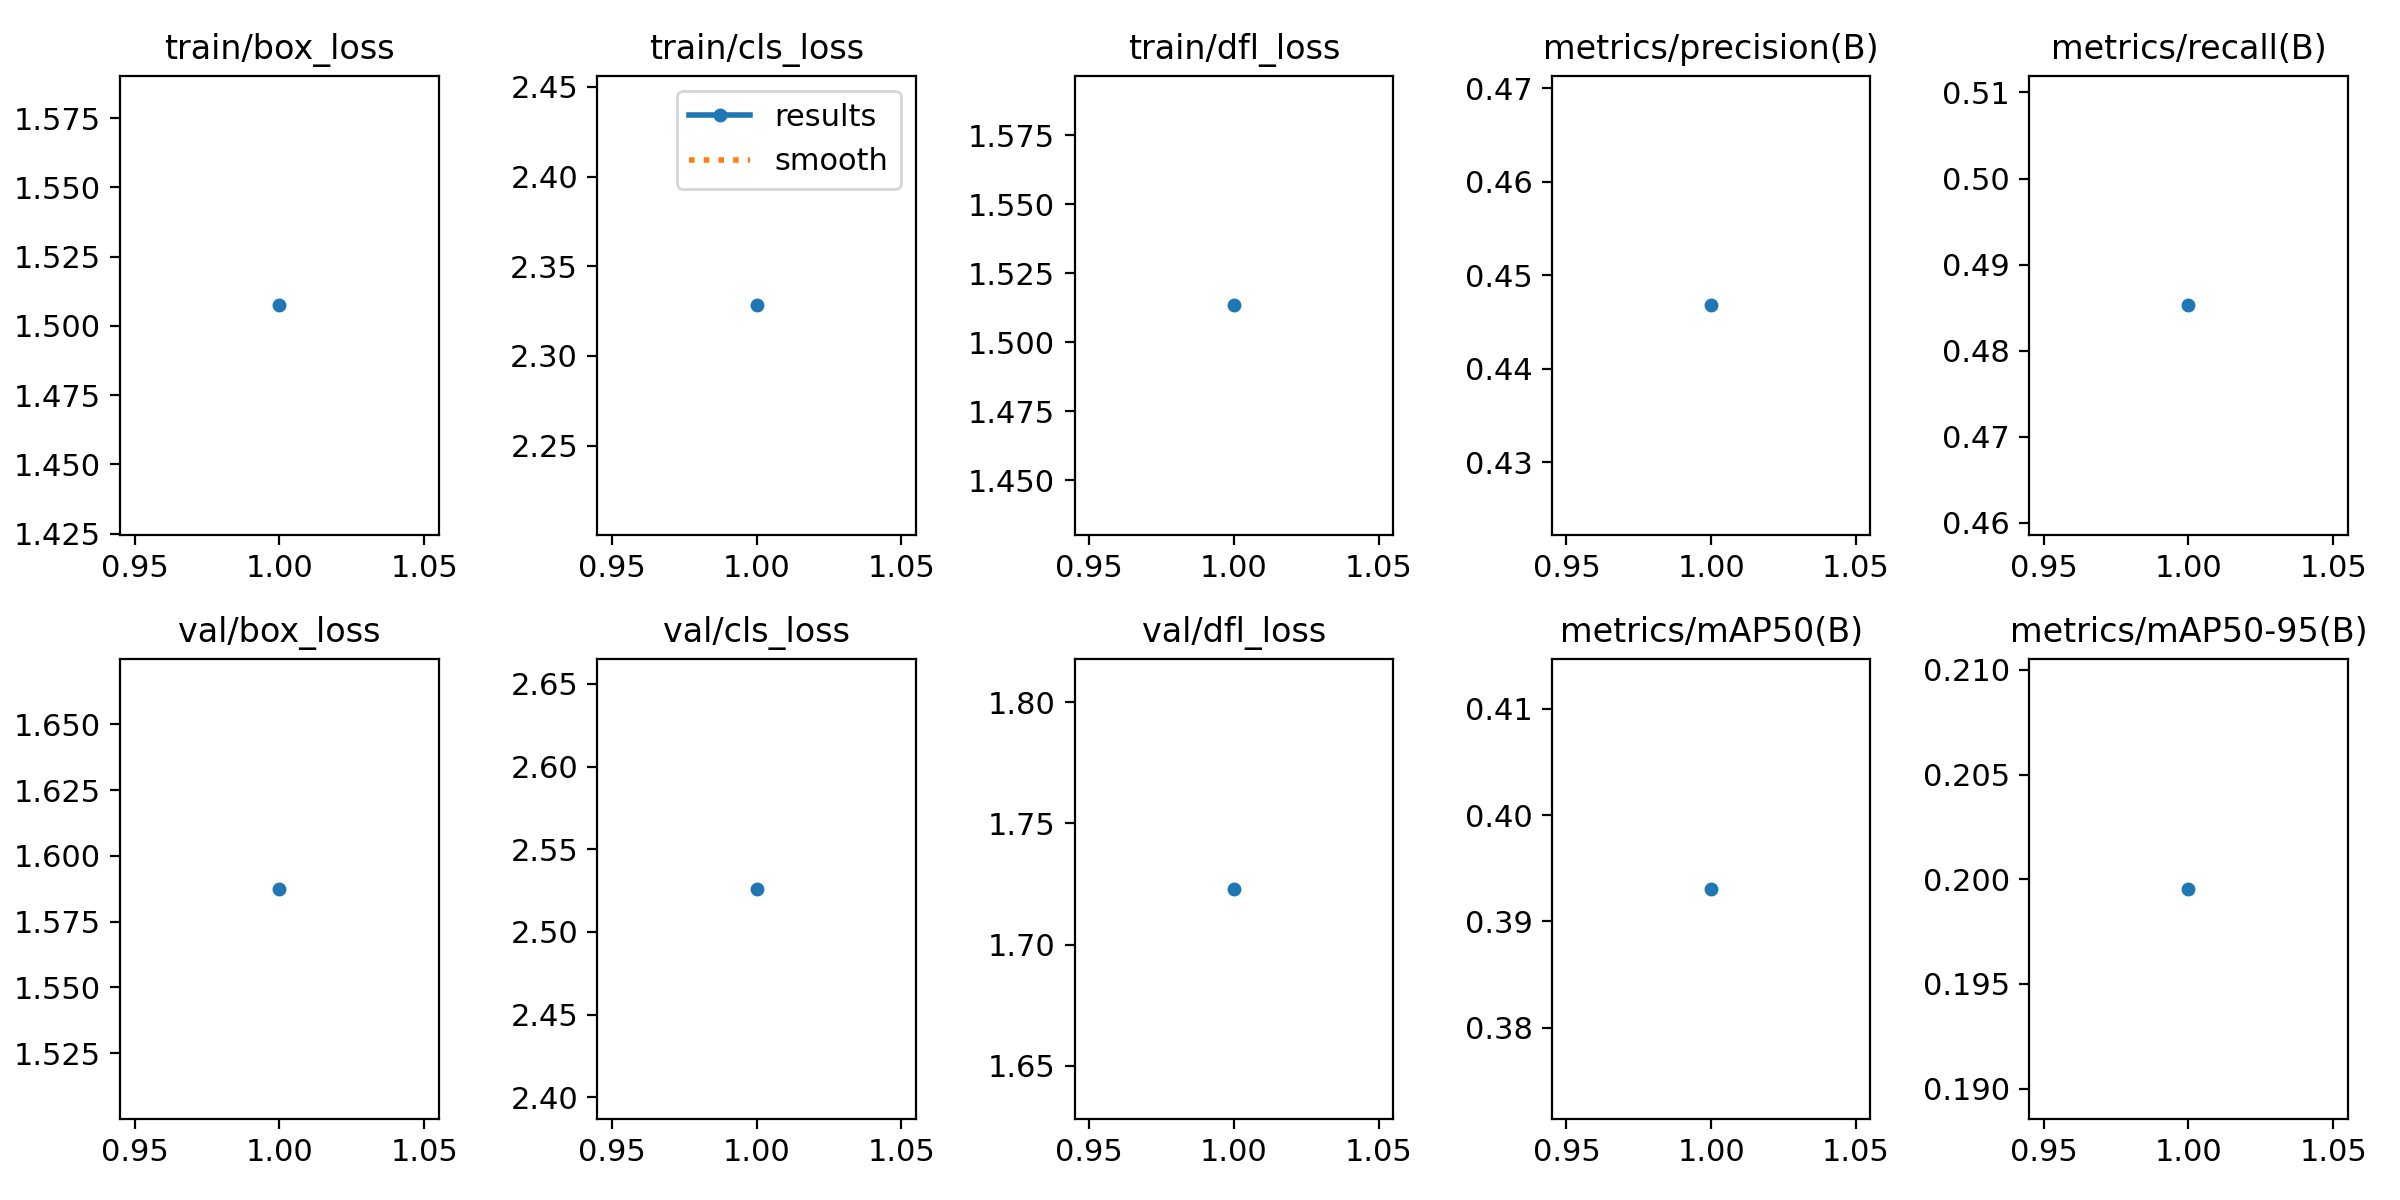

In [17]:
from IPython.display import Image

# Display the combined training result plots
Image(filename='runs/detect/train8/results.png')


In [19]:
import os

print(os.listdir("runs/detect/train8"))


['args.yaml', 'confusion_matrix.png', 'confusion_matrix_normalized.png', 'F1_curve.png', 'labels.jpg', 'labels_correlogram.jpg', 'PR_curve.png', 'P_curve.png', 'results.csv', 'results.png', 'R_curve.png', 'train_batch0.jpg', 'train_batch1.jpg', 'train_batch2.jpg', 'val_batch0_labels.jpg', 'val_batch0_pred.jpg', 'val_batch1_labels.jpg', 'val_batch1_pred.jpg', 'val_batch2_labels.jpg', 'val_batch2_pred.jpg', 'weights']


In [23]:
!yolo task=detect mode=val model=runs/detect/train8/weights/best.pt data=./continuous_fire-6/data.yaml

WARNING torchvision==0.18 is incompatible with torch==2.4.
Run 'pip install torchvision==0.19' to fix torchvision or 'pip install -U torch torchvision' to update both.
For a full compatibility table see https://github.com/pytorch/vision#installation
WARNING Known issue with torch==2.4.0 on Windows with CPU, recommend upgrading to torch>=2.4.1 to resolve https://github.com/ultralytics/ultralytics/issues/15049
Ultralytics 8.3.158  Python-3.11.7 torch-2.4.0 CPU (13th Gen Intel Core(TM) i5-1340P)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 179.372.7 MB/s, size: 9.1 KB)
                   all        754        950      0.443      0.485      0.394        0.2
Speed: 3.0ms preprocess, 358.6ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs\detect\val
 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\HP\Desktop\ml notes\continuous_fire-6\valid\labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100%|##########| 754/754 [00:00<?, ?it/s]
val: Scanning C:\Users\HP\Desktop\ml notes\continuous_fire-6\valid\labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100%|##########| 754/754 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/48 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|2         | 1/48 [00:05<04:39,  5.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   4%|4         | 2/48 [00:12<04:38,  6.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|6         | 3/48 [00:18<04:37,  6.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|8         | 4/48 [00:24<04:33,  6.23s

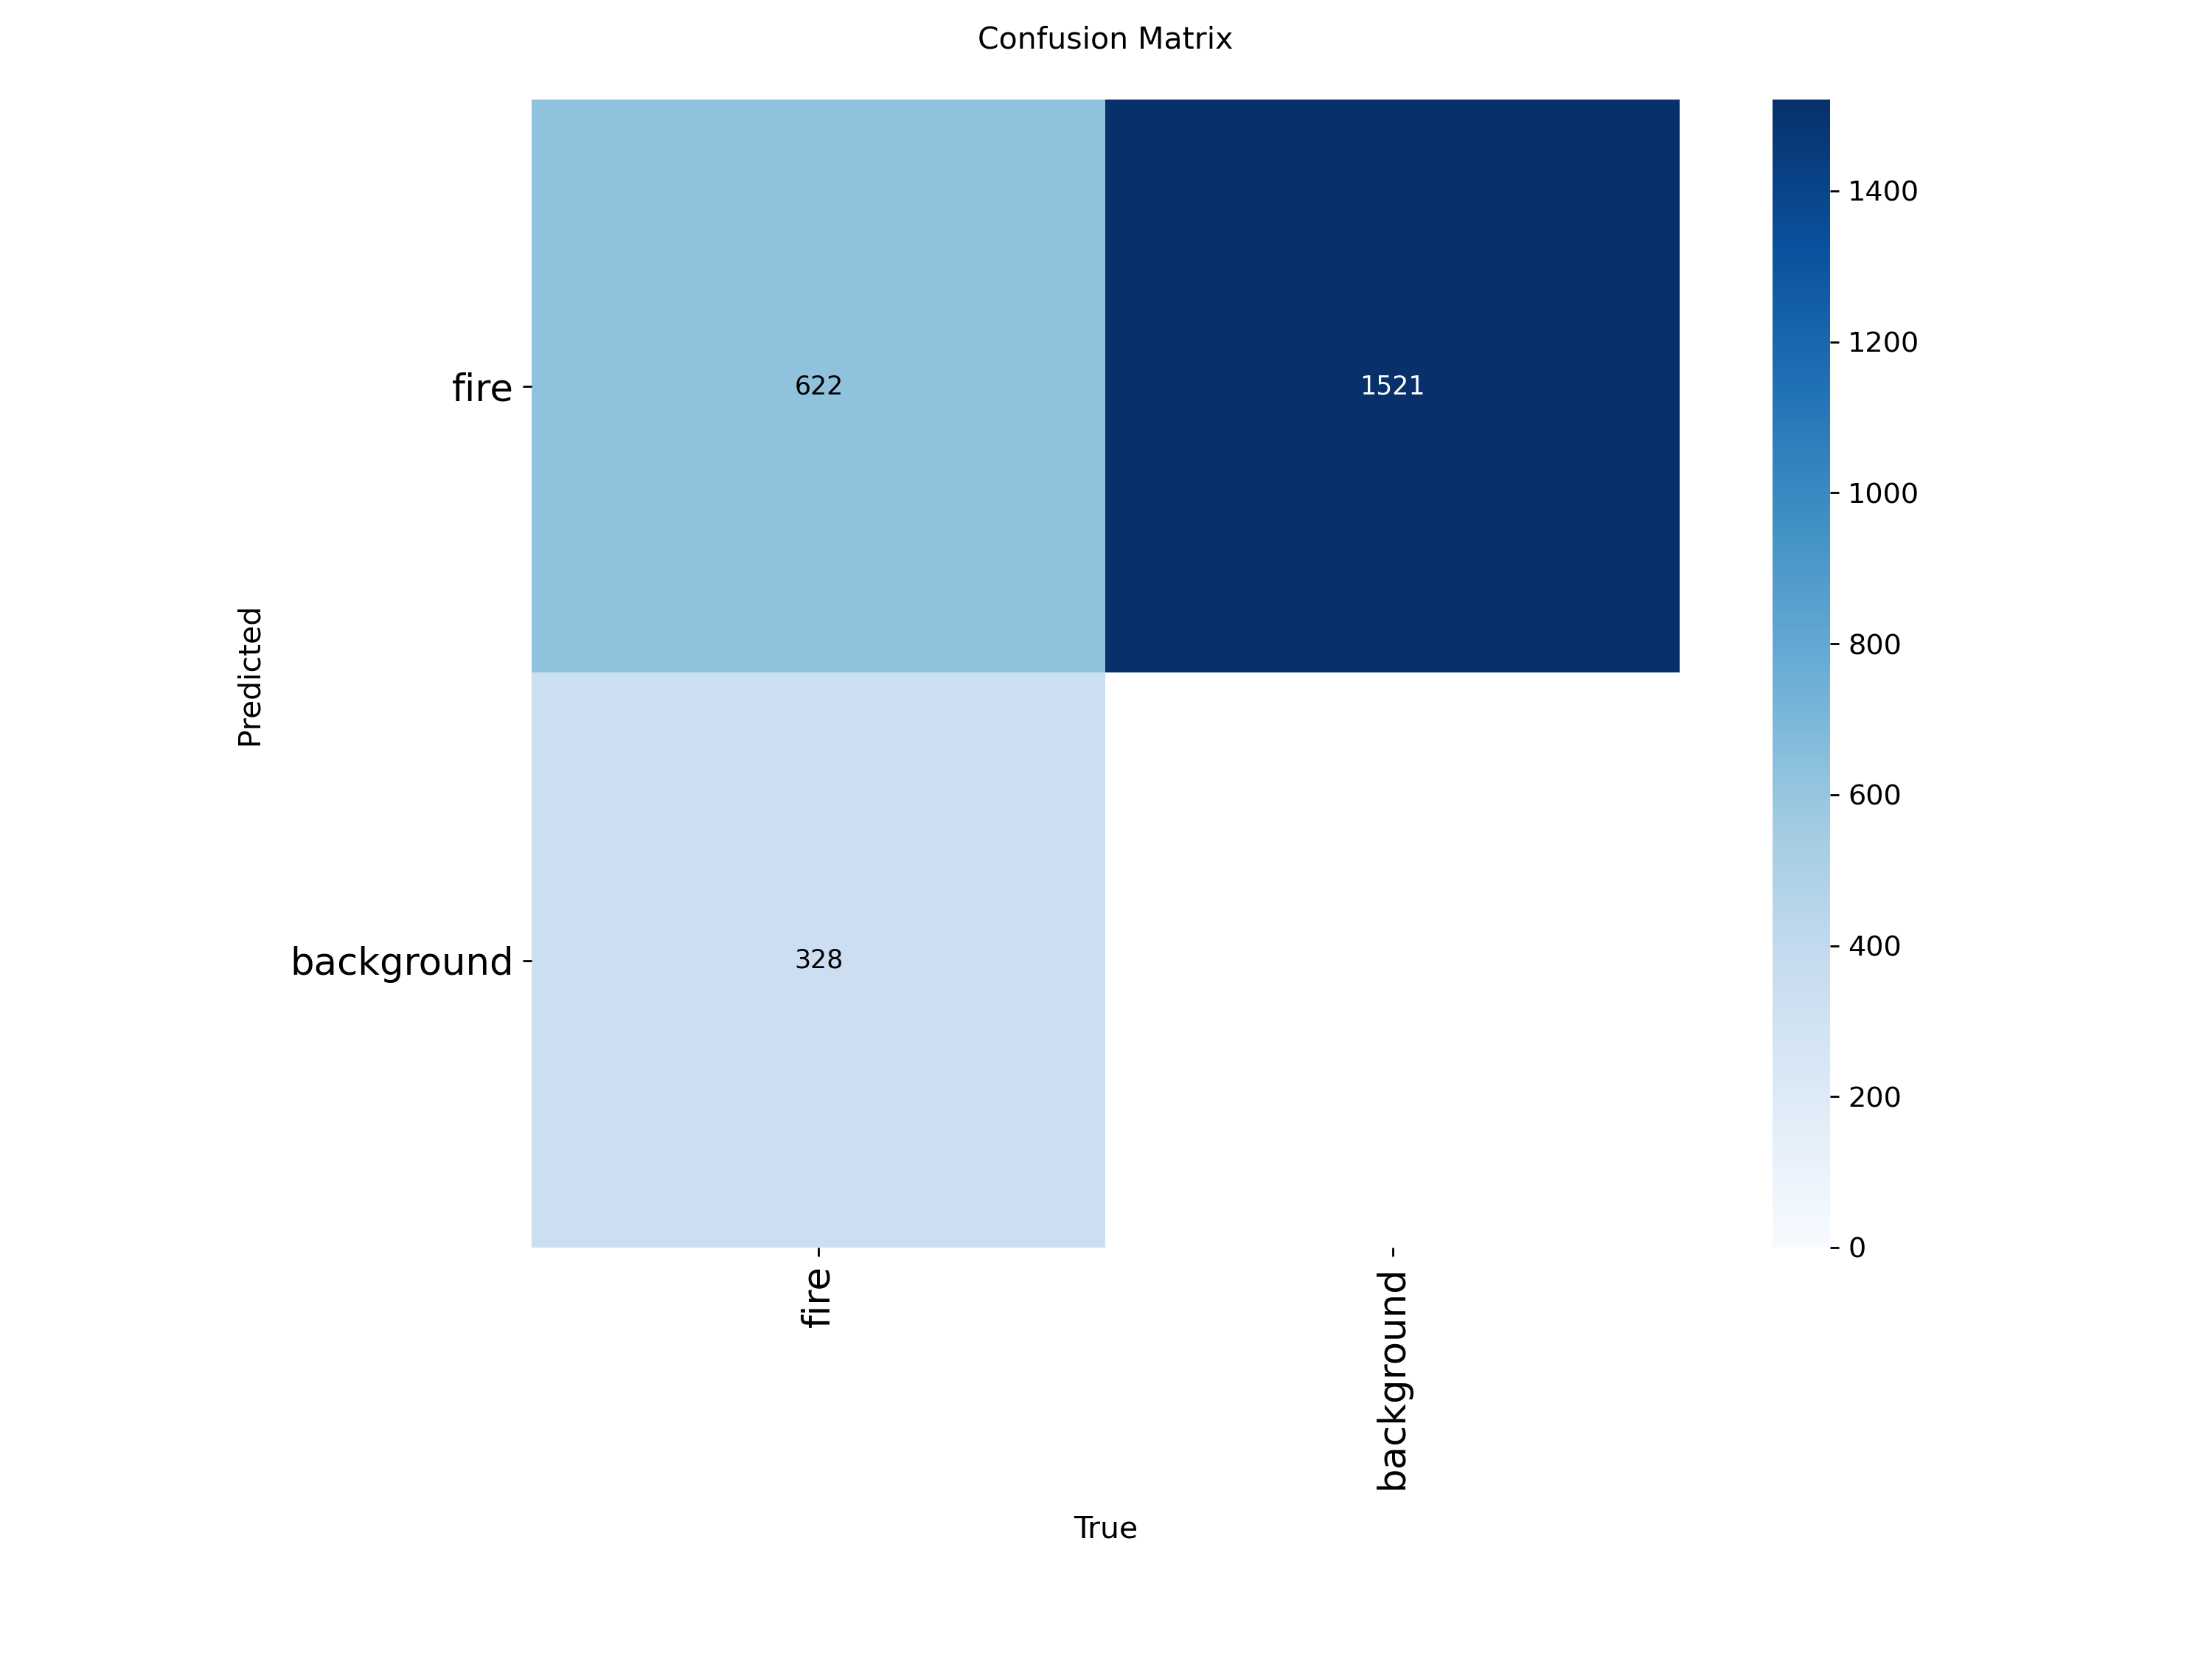

In [25]:
from IPython.display import Image
Image(filename='runs/detect/val/confusion_matrix.png')

In [131]:
#check predictions
from ultralytics import YOLO

model = YOLO("runs/detect/train8/weights/best.pt")  


In [133]:
results = model.predict(source="./fires.jpg", show=True,save=True)


image 1/1 C:\Users\HP\Desktop\ml notes\fires.jpg: 448x640 3 fires, 212.9ms
Speed: 4.9ms preprocess, 212.9ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2


In [135]:
import cv2
import matplotlib.pyplot as plt
names = model.names  # class names like {0: 'fire', 1: 'no_fire'}

for r in results:
    if r.boxes is not None and len(r.boxes) > 0:
        for box in r.boxes:
            class_id = int(box.cls[0])
            conf = float(box.conf[0])
            print(f"Detected: {names[class_id]} with confidence {conf:.2f}")

        # Plot detections on image
        im_array = r.plot()  # BGR image with bounding boxes
        im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Display using matplotlib
        plt.figure(figsize=(10, 8))
        plt.imshow(im_rgb)
        plt.axis('off')
        plt.title("🔥 Fire Detection Bounding Boxes")
        plt.show()
    else:
        print("⚠️ No detections found in this image.")

Detected: fire with confidence 0.64
Detected: fire with confidence 0.41
Detected: fire with confidence 0.29


<Figure size 1000x800 with 1 Axes>

In [137]:
fire_detected = any(model.names[int(box.cls[0])] == 'fire' for r in results for box in r.boxes)

if fire_detected:
    print("🔥 Fire detected!")
else:
    print("✅ No fire detected.")


🔥 Fire detected!


runs\detect\predict2
['fires.jpg']


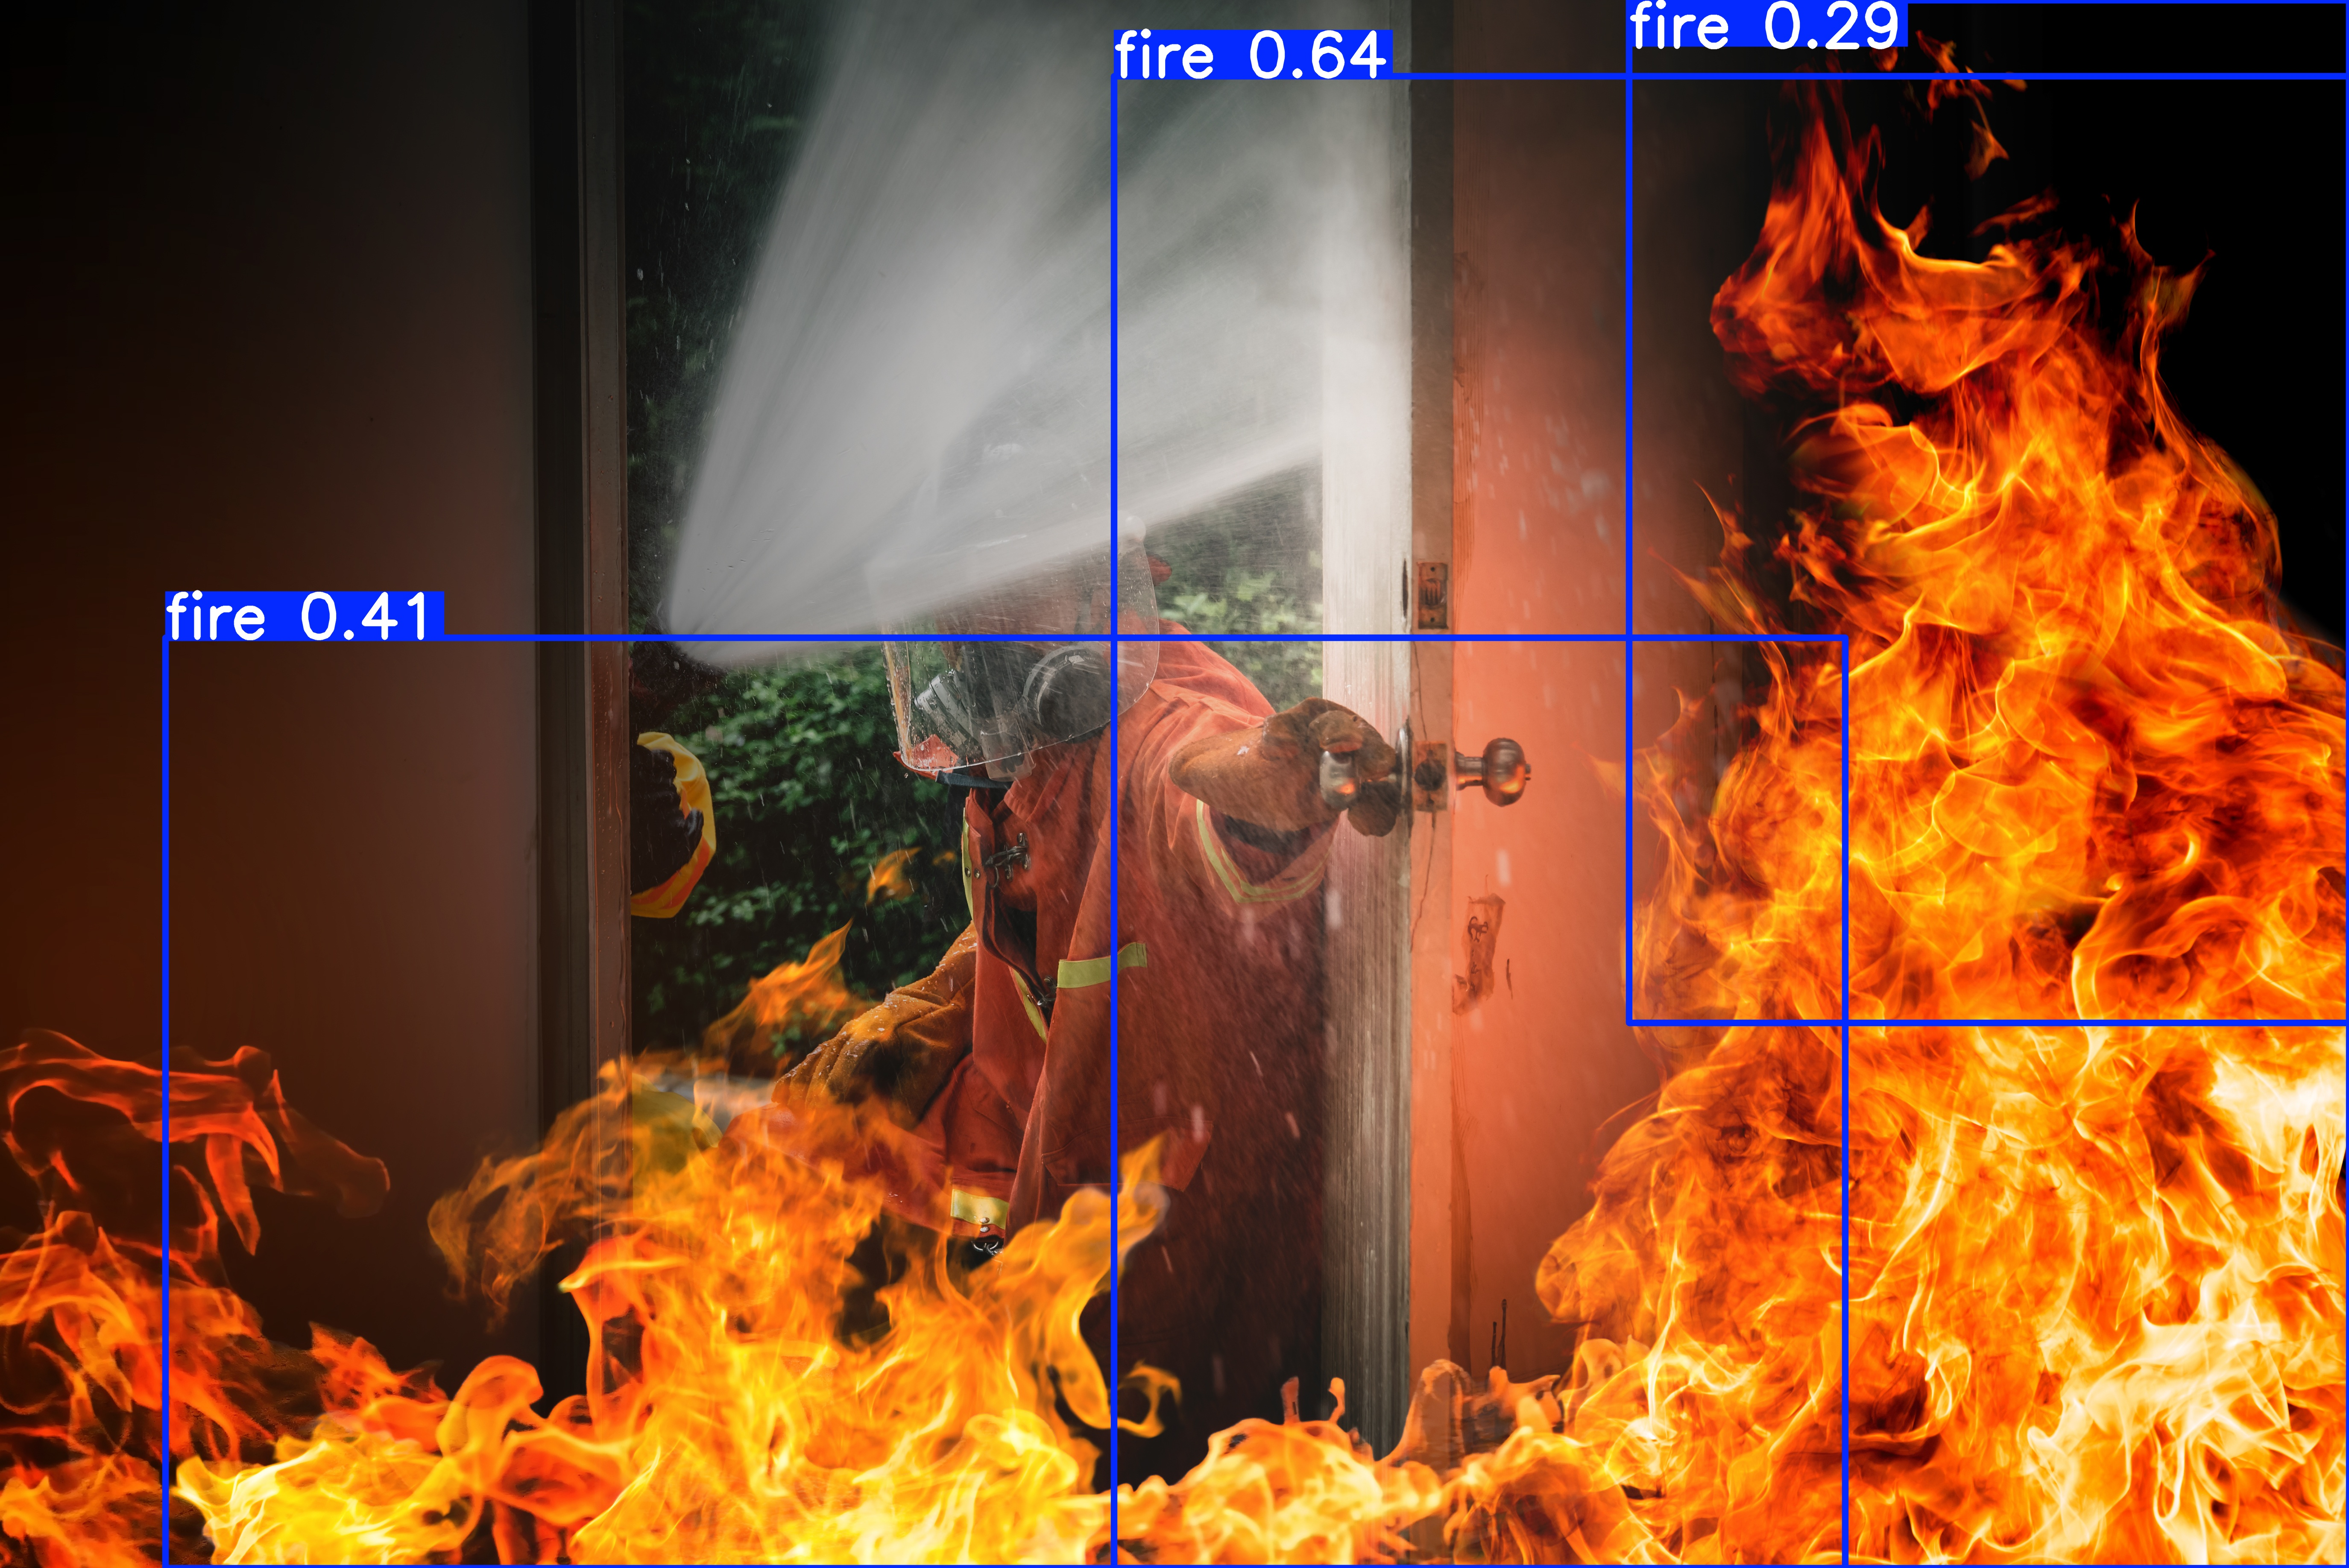

In [141]:
from IPython.display import Image, display
print(results[0].save_dir)
import os
print(os.listdir(results[0].save_dir))

display(Image(filename='runs/detect/predict2/fires.jpg'))